A-TTG-CTT   ACCTGGC-T   ACTA-GCTA   AGTAGCATT
For the above sequences;\
a) Calculating entropy,\
b) Calculates the Sum of Pairs score (Edit the sum of the distances of the binary sequences.),\
c) Write the computer program that finds the consensus sequence in Python language.

**ENTROPY:** Scores how similar multiple sequences are to each other.\
**SUM OF PAIRS**: It is the sum of the frequency values of the ideal sequence created by the consensus sequence.\
**CONSENSUS SEQUENCE**: Compares the sequences and extracts the frequency profile as a column.

# **Entropy Calculation**

Input row, column, sequence as input.

In [ ]:

import numpy as np
import math
import pandas as pd

row=int(input("enter no of rows: "))
col=int(input("enter no of coloumns: "))

a=np.array(list(input().strip().split(' '))).reshape(row,col)

print(a)

enter no of rows: 3
enter no of coloumns: 3
A G T A G C A T T
[['A' 'G' 'T']
 ['A' 'G' 'C']
 ['A' 'T' 'T']]


Outputs the alphabet used in the sequence.

In [ ]:
alfa=[]
for i in np.unique(a):
  alfa.append(i)

alfa

['A', 'C', 'G', 'T']

Searches for the letters '-', 'a', 'c', 'g', 't' (alphabet) in columns.

In [ ]:
def pattern_count(stList):
 freqList = []
 for symbol in alfa:
    ctr = 0
    for sym in stList:
        if sym == symbol:
            ctr += 1
    freqList.append(round(float(ctr) / len(stList),2))
 npa = np.asarray(freqList, dtype=np.float32)
 return npa

Columns are assigned to the pattern_count function, returning the result to the new matrix.\
**NOTE:** Since letter frequencies are analyzed on a column-by-column basis, it should be noted that *transpose* operation is performed on the entered matrix.

In [ ]:
b,_a=[],(a.T)
for i in range(col):
  asdcıktı=pattern_count(_a[i])
  b.append(asdcıktı)

my_array = np.array(b)
my_array 

array([[1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.67, 0.33],
       [0.  , 0.33, 0.  , 0.67]], dtype=float32)

**Column entropies:**

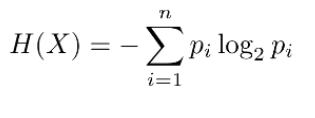

In [ ]:
entropi=0
for i in range(row):
  for j in range(col):
    entropi=entropi+ (my_array[i][j])*math.log1p(my_array[i][j])
  print(f"Column {i}: {entropi}")

Column 0: 0.6931471805599453
Column 1: 1.0367390255215252
Column 2: 1.1308480834517984


# **Consensus Sequence and Sum of Pairs**
In molecular biology and bioinformatics, the consensus sequence is the calculated order of the most frequent residues, such as the nucleotide or amino acid, at each position in a sequence alignment. In the ideal sequence created, edit gives the distance sum of the binary sequences.

In [ ]:
seqList = ["A-TTG-CTT", "ACCTGGC-T","ACTA-GCTA","AGTAGCATT"]
n = len(seqList[0])
profile = { 'T':[0]*n,'G':[0]*n ,'C':[0]*n,'A':[0]*n,'-':[0]*n } #holds letters of the alphabet and repeat numbers
lm=[] #list for sum of pairs 
for seq in seqList:
    for i, char in enumerate(seq):
        profile[char][i] += 1 #sequences are profiled
consensus = ""
print("Consensus Sequence: ")
for i in range(n):
    max_count = 0
    max_nt = 'x'
    for nt in "ACGT-":
        if profile[nt][i] > max_count:#finds the alphabet that takes the max value
            max_count = profile[nt][i]
            max_nt = nt
    lm.append(max_count) #adds max values in columns
    consensus += max_nt
print(consensus) #The ideal sequence created with the highest score
print("\nProfile:")
for key, value in profile.items(): #It gets the max value values by hovering over the items of the dict type
     print(key,':', " ".join([str(x) for x in value] ))



Consensus Sequence: 
ACTAGGCTT

Profile:
T : 0 0 3 2 0 0 0 3 3
G : 0 1 0 0 3 2 0 0 0
C : 0 2 1 0 0 1 3 0 0
A : 4 0 0 2 0 0 1 0 1
- : 0 1 0 0 1 1 0 1 0


In [ ]:
lm 

[4, 2, 3, 2, 3, 2, 3, 3, 3]

In [ ]:
sum(lm) #Sum of Pairs

25